In [1]:
from torchvision.models import resnet50
import torch
from torch.autograd import Variable
import torch
import torch.nn
from torch.autograd.gradcheck import zero_gradients
import matplotlib.pyplot as plt
import json
import numpy as np
import torch.nn.functional as F
from torchvision.models import resnet50
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [8]:
model = resnet50(pretrained=True)
myImage = Image.open('Elephant2.jpg')
#load the existing model
model = resnet50(pretrained=True).eval()

preprocess = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
myTensor = preprocess(myImage)[None,:,:,:]
#myTensor=torch.unsqueeze(myTensor, 0)
predVector = model(myTensor)
#print(predVector)
value, index = predVector.squeeze().max(0)
print(index.item())
print(value.item())

#load the label index

with open('imagenet_class_index.json') as f:
    data = json.load(f)
labels_json = data
labels = {int(idx):label for idx, label in labels_json.items()}
x_pred = labels[index.item()]

print(x_pred)

101
18.47801399230957
['n01871265', 'tusker']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


African_elephant


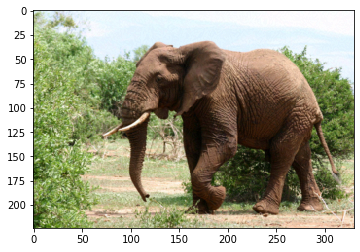

In [9]:
image_tensor=myTensor;
y_target = Variable(torch.LongTensor([1]), requires_grad=False)    #1 is a random number to set the target value
epsilon = 0.3
num_steps = 5
alpha = 0.030
#hyper parameters
# i am using FGSM Methodology
img_variable = Variable(image_tensor, requires_grad=True)
img_variable.data = image_tensor   #in previous method we assigned it to the adversarial img

zero_gradients(img_variable) #flush all gradients
output = model(img_variable) #perform forward pass
loss = torch.nn.CrossEntropyLoss()
loss_cal = loss(output, y_target)
loss_cal.backward()
x_grad = alpha * torch.sign(img_variable.grad.data)
adv_temp = img_variable.data - x_grad
total_grad = adv_temp - image_tensor
total_grad = torch.clamp(total_grad, -epsilon, epsilon)
x_adv = image_tensor + total_grad  #add noise to img_variable
img_variable.data = x_adv
output_adv = model(img_variable)
value, index = output_adv.squeeze().max(0)
x_adv_pred=labels[index.item()][1]

print(x_adv_pred)

x=img_variable
x = x.squeeze(0)
x = x.mul(torch.FloatTensor([0.229, 0.224, 0.225]).view(3,1,1)).add(torch.FloatTensor([0.485, 0.456, 0.406]).view(3,1,1)).detach().numpy()
plt.imshow(np.transpose( x , (1,2,0)) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


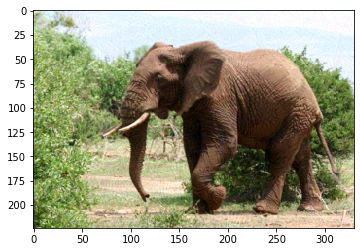

In [10]:
image_tensor=myTensor;
y_target = Variable(torch.LongTensor([466]), requires_grad=False)    #466= bullet_train
epsilon = 0.3
num_steps = 5
alpha = 0.030
#hyper parameters
# i am using FGSM Methodology
img_variable = Variable(image_tensor, requires_grad=True)
img_variable.data = image_tensor   #in previous method we assigned it to the adversarial img
for i in range(num_steps):
    zero_gradients(img_variable) #flush all gradients
    output = model(img_variable) #perform forward pass
    loss = torch.nn.CrossEntropyLoss()
    loss_cal = loss(output, y_target)
    loss_cal.backward()
    x_grad = alpha * torch.sign(img_variable.grad.data)
    adv_temp = img_variable.data - x_grad
    total_grad = adv_temp - image_tensor
    total_grad = torch.clamp(total_grad, -epsilon, epsilon)
    x_adv = image_tensor + total_grad  #add noise to img_variable
    img_variable.data = x_adv

output_adv = model(img_variable)
value, index = output_adv.squeeze().max(0)
x_adv_pred=labels[index.item()][1]

x_adv_pred

x=img_variable
x = x.squeeze(0)
x = x.mul(torch.FloatTensor([0.229, 0.224, 0.225]).view(3,1,1)).add(torch.FloatTensor([0.485, 0.456, 0.406]).view(3,1,1)).detach().numpy()
plt.imshow(np.transpose( x , (1,2,0)) )